Load Data: Read the raw data into a Pandas DataFrame from your data/ folder.

In [81]:
# load data set 09288180_1980_2020.csv from data folder
import pandas as pd
streamflow_starvationres = pd.read_csv('../data/09288180_1980_2020.csv')
print(streamflow_starvationres.head())

     Datetime  USGS_flow    variable  USGS_ID measurement_unit     qualifiers  \
0  1986-10-01  176.25714  streamflow  9288180            ft3/s  ['A', '[91]']   
1  1986-10-02  162.18750  streamflow  9288180            ft3/s  ['A', '[91]']   
2  1986-10-03  136.50000  streamflow  9288180            ft3/s  ['A', '[91]']   
3  1986-10-04  136.00000  streamflow  9288180            ft3/s  ['A', '[91]']   
4  1986-10-05  136.00000  streamflow  9288180            ft3/s  ['A', '[91]']   

   series  
0       0  
1       0  
2       0  
3       0  
4       0  


In [73]:
# load data set 09292000_1980_2020.csv from data folder
import pandas as pd
streamflow_yellowstone = pd.read_csv('../data/09292000_1980_2020.csv')
print(streamflow_yellowstone.head())


     Datetime  USGS_flow    variable  USGS_ID measurement_unit     qualifiers  \
0  1996-08-06  80.109590  streamflow  9292000            ft3/s  ['A', '[91]']   
1  1996-08-07  74.309280  streamflow  9292000            ft3/s  ['A', '[91]']   
2  1996-08-08  68.608246  streamflow  9292000            ft3/s  ['A', '[91]']   
3  1996-08-09  64.350520  streamflow  9292000            ft3/s  ['A', '[91]']   
4  1996-08-10  62.402060  streamflow  9292000            ft3/s  ['A', '[91]']   

   series  
0       0  
1       0  
2       0  
3       0  
4       0  


In [5]:
# load data set 09299500_1980_2020.csv from data folder
import pandas as pd
streamflow_whiterocks = pd.read_csv('../data/09299500_1980_2020.csv')
print(streamflow_whiterocks.head())

     Datetime  USGS_flow    variable  USGS_ID measurement_unit qualifiers  \
0  1986-10-01  84.411766  streamflow  9299500            ft3/s      ['A']   
1  1986-10-02  92.916664  streamflow  9299500            ft3/s      ['A']   
2  1986-10-03  98.583336  streamflow  9299500            ft3/s      ['A']   
3  1986-10-04  86.000000  streamflow  9299500            ft3/s      ['A']   
4  1986-10-05  88.125000  streamflow  9299500            ft3/s      ['A']   

   series  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
# load data set 09301500_1980_2020.csv from data folder
import pandas as pd
streamflow_uinta = pd.read_csv('../data/09301500_1980_2020.csv')
print(streamflow_uinta.head())
print("Uinta data date range:")

     Datetime  USGS_flow    variable  USGS_ID measurement_unit     qualifiers  \
0  1998-03-26  189.94286  streamflow  9301500            ft3/s  ['A', '[91]']   
1  1998-03-27  209.32292  streamflow  9301500            ft3/s  ['A', '[91]']   
2  1998-03-28  244.72165  streamflow  9301500            ft3/s  ['A', '[91]']   
3  1998-03-29  306.89795  streamflow  9301500            ft3/s  ['A', '[91]']   
4  1998-03-30  300.17526  streamflow  9301500            ft3/s  ['A', '[91]']   

   series  
0       0  
1       0  
2       0  
3       0  
4       0  
Uinta data date range:
Start: 0
End: 8223


In [77]:
# set Datetime as index for whiterocks and yellowstone data sets
streamflow_yellowstone["Datetime"] = pd.to_datetime(streamflow_yellowstone["Datetime"])
streamflow_yellowstone = streamflow_yellowstone.set_index("Datetime")
streamflow_whiterocks["Datetime"] = pd.to_datetime(streamflow_whiterocks["Datetime"])
streamflow_whiterocks = streamflow_whiterocks.set_index("Datetime")


KeyError: 'Datetime'

In [82]:
# set Datetime as index for starvationres and uinta data sets
streamflow_starvationres["Datetime"] = pd.to_datetime(streamflow_starvationres["Datetime"])
streamflow_starvationres = streamflow_starvationres.set_index("Datetime")
streamflow_uinta["Datetime"] = pd.to_datetime(streamflow_uinta["Datetime"])
streamflow_uinta = streamflow_uinta.set_index("Datetime")

KeyError: 'Datetime'

Process the data: Subset the data so that all of the data is overlapping and is 6 years in length.

In [83]:
# slice all data sets to include data from 1999 to 2005
streamflow_starvationres_1999_2005 = streamflow_starvationres.loc['1999-01-01':'2005-12-31']
streamflow_yellowstone_1999_2005 = streamflow_yellowstone.loc['1999-01-01':'2005-12-31']
streamflow_whiterocks_1999_2005 = streamflow_whiterocks.loc['1999-01-01':'2005-12-31']  
streamflow_uinta_1999_2005 = streamflow_uinta.loc['1999-01-01':'2005-12-31']

Exploratory Data Analysis (EDA): Create an initial time-series plot of the data, ensure the plot has a title, axes labels, legend, etc. Create a figure with four subplots to visualize the data.

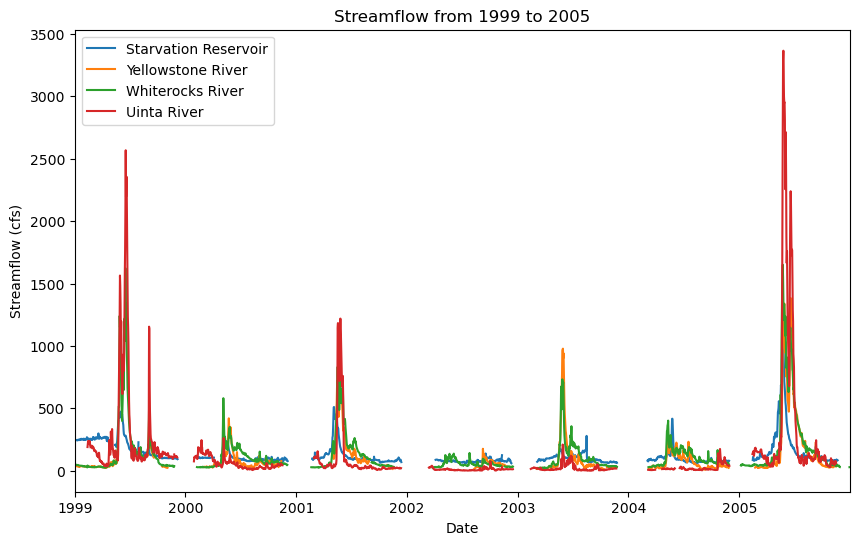

In [84]:
# create plot with all four data sets from 1999 through 2005
plt.figure(figsize=(10,6))
plt.plot(streamflow_starvationres_1999_2005["USGS_flow"], label="Starvation Reservoir")
plt.plot(streamflow_yellowstone_1999_2005["USGS_flow"], label="Yellowstone River")
plt.plot(streamflow_whiterocks_1999_2005["USGS_flow"], label="Whiterocks River")
plt.plot(streamflow_uinta_1999_2005["USGS_flow"], label="Uinta River")
plt.xlabel("Date")
plt.ylabel("Streamflow (cfs)")
plt.title("Streamflow from 1999 to 2005")
plt.legend()
plt.xlim(pd.to_datetime("1999-01-01"), pd.to_datetime("2005-12-31"))
plt.show()

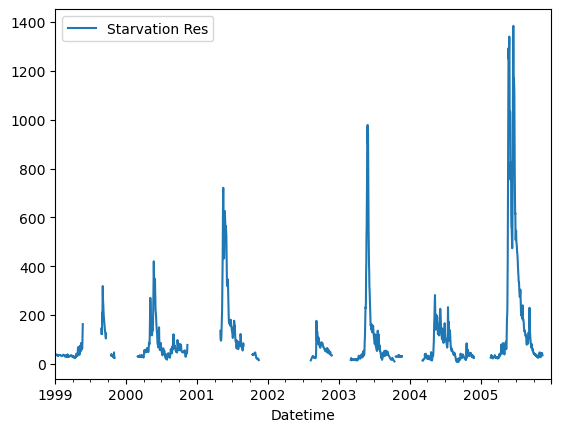

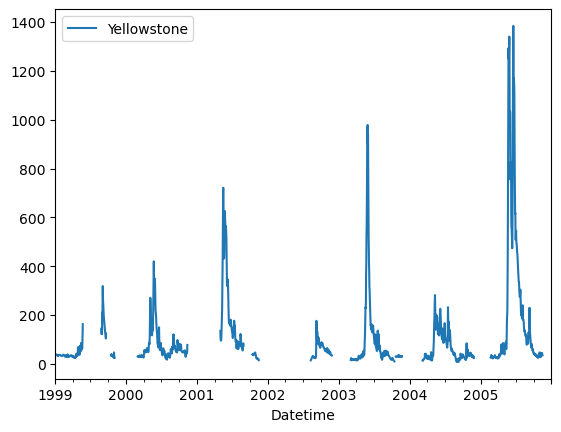

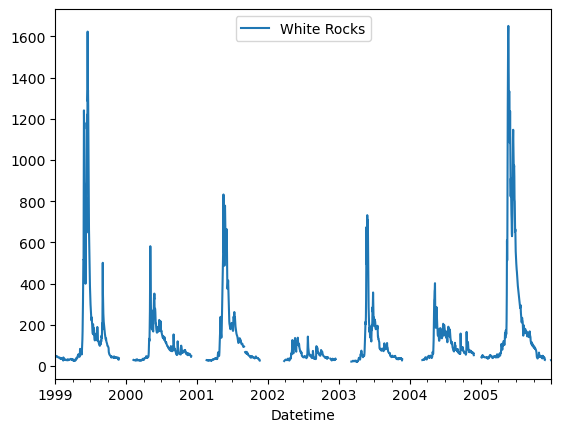

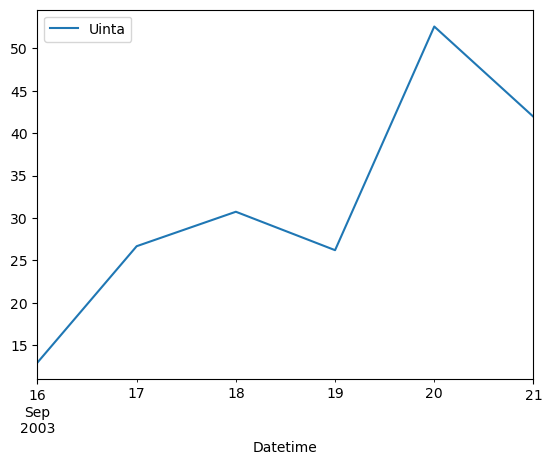

In [ ]:
# using the above plot, split into 4 subplots in a 2 by 2 grid showing each data set




Weekly Mean: Resample the daily data to a Weekly mean.

In [85]:
# for each data set, resample to weekly averages    
streamflow_starvationres_weekly = streamflow_starvationres_1999_2005['USGS_flow'].resample('W').mean()
streamflow_yellowstone_weekly = streamflow_yellowstone_1999_2005['USGS_flow'].resample('W').mean()
streamflow_whiterocks_weekly = streamflow_whiterocks_1999_2005['USGS_flow'].resample('W').mean()
streamflow_uinta_weekly = streamflow_uinta_1999_2005['USGS_flow'].resample('W').mean()

In [86]:
# for each data set, resample to monthly totals 
streamflow_starvationres_monthly = streamflow_starvationres_1999_2005['USGS_flow'].resample('M').sum()
streamflow_yellowstone_monthly = streamflow_yellowstone_1999_2005['USGS_flow'].resample('M').sum()
streamflow_whiterocks_monthly = streamflow_whiterocks_1999_2005['USGS_flow'].resample('M').sum()
streamflow_uinta_monthly = streamflow_uinta_1999_2005['USGS_flow'].resample('M').sum()

/scratch/local/u1589214/879290/ipykernel_3983797/330841325.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  streamflow_starvationres_monthly = streamflow_starvationres_1999_2005['USGS_flow'].resample('M').sum()
/scratch/local/u1589214/879290/ipykernel_3983797/330841325.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  streamflow_yellowstone_monthly = streamflow_yellowstone_1999_2005['USGS_flow'].resample('M').sum()
/scratch/local/u1589214/879290/ipykernel_3983797/330841325.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  streamflow_whiterocks_monthly = streamflow_whiterocks_1999_2005['USGS_flow'].resample('M').sum()
/scratch/local/u1589214/879290/ipykernel_3983797/330841325.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  streamflow_uinta_monthly = streamflow

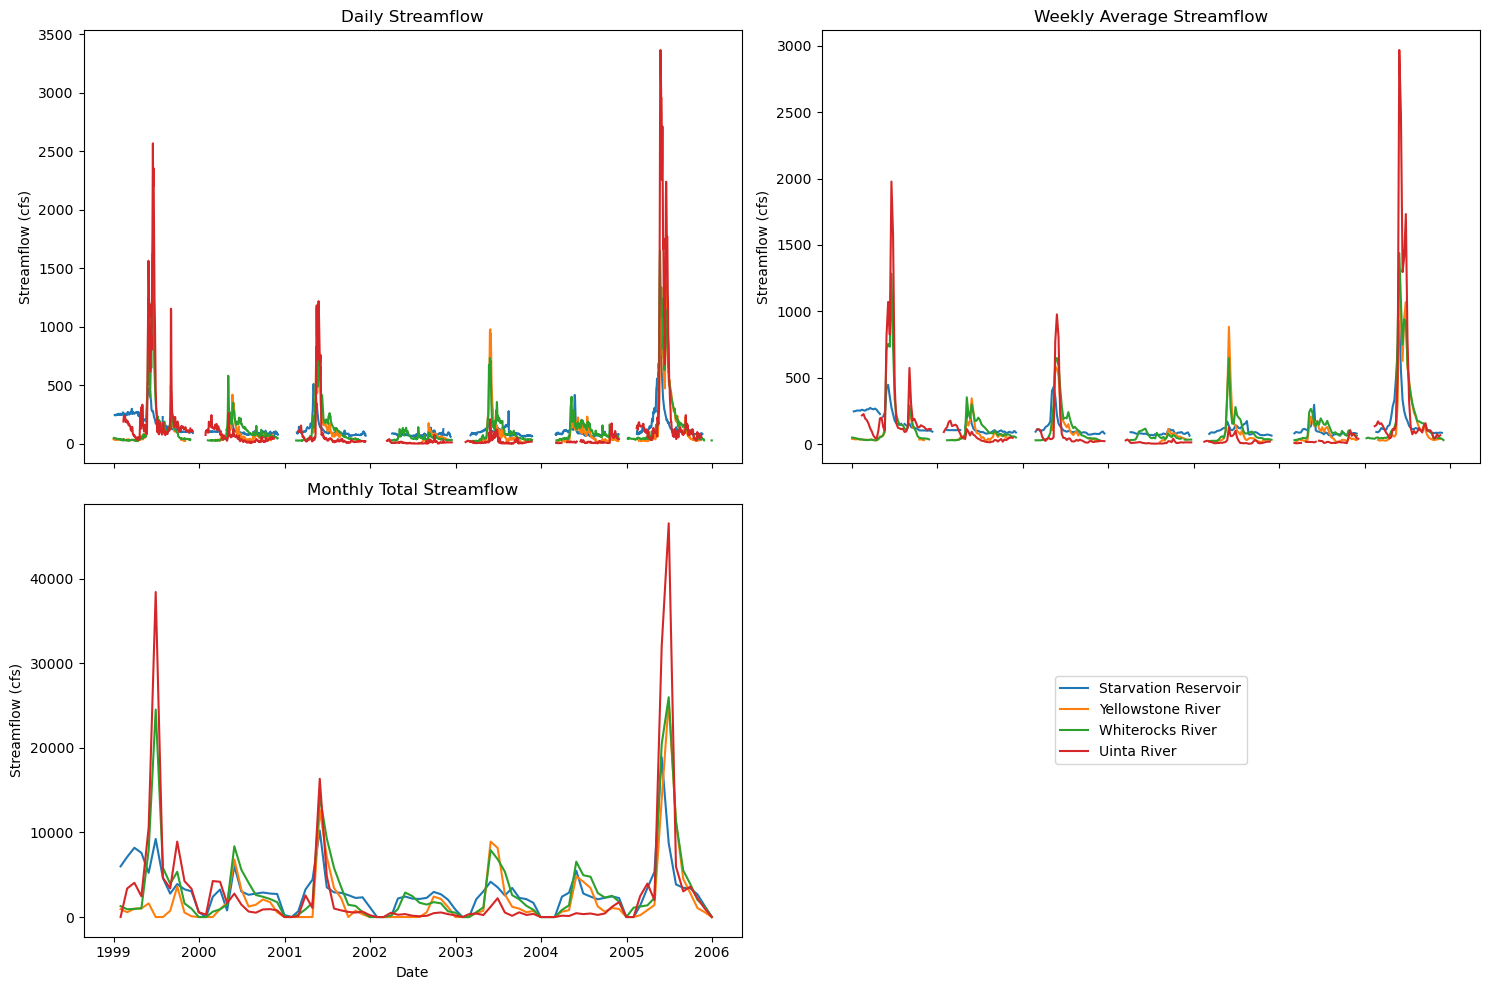

In [87]:
# create four subplots in a 2 by 2 grid, with the first subplot showing the daily streamflow for all four data sets, the second subplot showing the weekly average streamflow for all four data sets, the third subplot showing the monthly total streamflow for all four data sets, and the fourth subplot showing the legend for all four data sets
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axs[0, 0].plot(streamflow_starvationres_1999_2005["USGS_flow"], label="Starvation Reservoir")
axs[0, 0].plot(streamflow_yellowstone_1999_2005["USGS_flow"], label="Yellowstone River")
axs[0, 0].plot(streamflow_whiterocks_1999_2005["USGS_flow"], label="Whiterocks River")
axs[0, 0].plot(streamflow_uinta_1999_2005["USGS_flow"], label="Uinta River")
axs[0, 0].set_title("Daily Streamflow")
axs[0, 0].set_ylabel("Streamflow (cfs)")
axs[0, 1].plot(streamflow_starvationres_weekly, label="Starvation Reservoir")  
axs[0, 1].plot(streamflow_yellowstone_weekly, label="Yellowstone River")
axs[0, 1].plot(streamflow_whiterocks_weekly, label="Whiterocks River")
axs[0, 1].plot(streamflow_uinta_weekly, label="Uinta River")
axs[0, 1].set_title("Weekly Average Streamflow")
axs[0, 1].set_ylabel("Streamflow (cfs)")
axs[1, 0].plot(streamflow_starvationres_monthly, label="Starvation Reservoir")
axs[1, 0].plot(streamflow_yellowstone_monthly, label="Yellowstone River")
axs[1, 0].plot(streamflow_whiterocks_monthly, label="Whiterocks River")
axs[1, 0].plot(streamflow_uinta_monthly, label="Uinta River")
axs[1, 0].set_title("Monthly Total Streamflow")
axs[1, 0].set_xlabel("Date")
axs[1, 0].set_ylabel("Streamflow (cfs)")

# get handles and labels from daily streamflow plot and display in the fourth subplot
handles, labels = axs[0, 0].get_legend_handles_labels()
axs[1, 1].legend(handles, labels, loc='center')
axs[1, 1].axis('off')
plt.tight_layout()
plt.show()

Aggregation (wet year): within your plotting function to show off the range of flow for each dataset (e.g. min/max for each day), and plot the wet year of interest for each stream

In [ ]:
# for starvationres and yellowstone data sets, plot the min and max of each day for each set for the year 2005
